In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers

In [3]:
import pandas as pd

# 데이터 파일 경로 설정
file_path = "./seeds_dataset.txt"

# 데이터 파일 읽기
column_names = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'Class']
df = pd.read_csv(file_path, sep='\t', header=None, names=column_names)

df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [4]:
# 결측치 확인
df.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Class                      0
dtype: int64

In [5]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Class                      0
dtype: int64

Text(0, 0.5, 'Count')

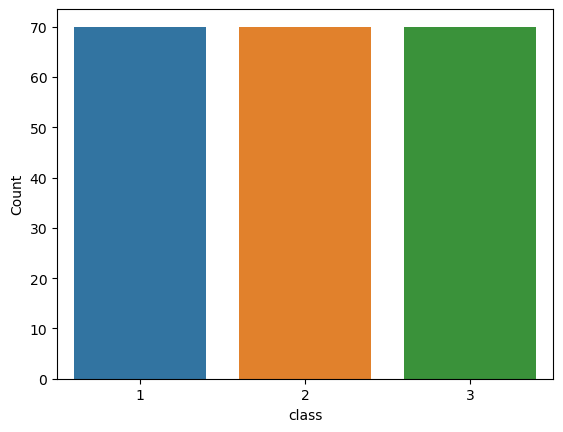

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Class")
plt.xlabel("class")
plt.ylabel("Count")

In [7]:
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove',
       'Class'],
      dtype='object')

In [8]:
X=df.drop('Class', axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [9]:
y=df['Class']
y.value_counts()

Class
1    70
2    70
3    70
Name: count, dtype: int64

In [10]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

X_train

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,-0.746116,-0.659724,-1.022187,-0.476551,-0.906322,-0.254136,-0.348533
1,0.622328,0.695258,0.184523,0.954009,0.571724,-1.096600,0.963359
2,-0.432158,-0.523469,0.747049,-0.614490,-0.252674,-0.732597,-0.456165
3,1.277543,1.270557,0.719830,1.176491,1.129326,-1.297567,0.997883
4,1.311669,1.414382,-0.037766,1.470167,0.915890,0.467881,1.420288
...,...,...,...,...,...,...,...
152,-0.271767,-0.190400,-0.368930,-0.033812,-0.247338,-0.978814,-0.549582
153,-1.002059,-1.151756,0.402275,-1.095051,-0.794268,-0.060489,-0.549582
154,1.482298,1.444661,0.833243,1.381174,1.505507,-0.401866,1.588844
155,0.062665,0.013982,0.801487,-0.120580,0.336944,-0.485714,-0.462258


In [12]:
# 신경망 모델 구축
inputs = Input(shape=(X_train.shape[1],))

x = Dense(32, activation='relu')(inputs)
x = Dense(24, activation='relu')(x)
x = layers.Dropout(0.3)(x) # 드롭아웃으로 노드 비활성화
x = Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x) # 드롭아웃으로 노드 비활성화
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=prediction)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# 신경망 훈련, 검증 데이터 전달, 조기종료 적용
early_stopping = EarlyStopping()
history = model.fit(X_train, y_train, epochs=100, batch_size=144, validation_data=(X_test, y_test), callbacks = [early_stopping], verbose=2)

Epoch 1/100
2/2 - 0s - loss: 0.8653 - accuracy: 0.6943 - val_loss: 0.8200 - val_accuracy: 0.8868 - 59ms/epoch - 30ms/step
Epoch 2/100
2/2 - 0s - loss: 0.8511 - accuracy: 0.7325 - val_loss: 0.8065 - val_accuracy: 0.8868 - 22ms/epoch - 11ms/step
Epoch 3/100
2/2 - 0s - loss: 0.8457 - accuracy: 0.7580 - val_loss: 0.7926 - val_accuracy: 0.8868 - 22ms/epoch - 11ms/step
Epoch 4/100
2/2 - 0s - loss: 0.8512 - accuracy: 0.7516 - val_loss: 0.7786 - val_accuracy: 0.8868 - 24ms/epoch - 12ms/step
Epoch 5/100
2/2 - 0s - loss: 0.7978 - accuracy: 0.7325 - val_loss: 0.7647 - val_accuracy: 0.8868 - 22ms/epoch - 11ms/step
Epoch 6/100
2/2 - 0s - loss: 0.7700 - accuracy: 0.7898 - val_loss: 0.7502 - val_accuracy: 0.8868 - 22ms/epoch - 11ms/step
Epoch 7/100
2/2 - 0s - loss: 0.8218 - accuracy: 0.7134 - val_loss: 0.7352 - val_accuracy: 0.8868 - 22ms/epoch - 11ms/step
Epoch 8/100
2/2 - 0s - loss: 0.7806 - accuracy: 0.7962 - val_loss: 0.7198 - val_accuracy: 0.8868 - 21ms/epoch - 10ms/step
Epoch 9/100
2/2 - 0s - l

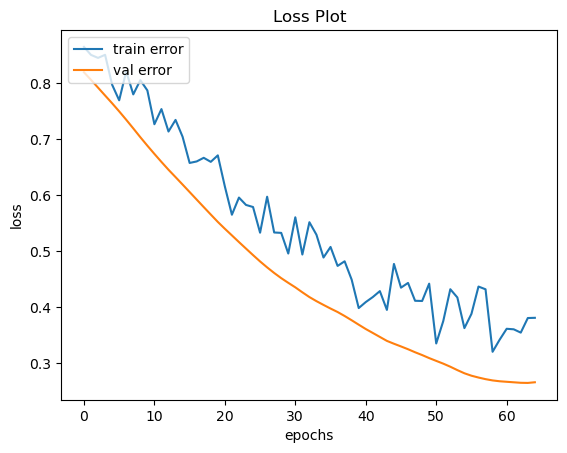

In [16]:
# 훈련 데이터와 손실값의 검증 데이터의 손실값을 그래프에 출력, 조기종료 적용
history_dict = history.history
loss_values = history_dict['loss'] # 훈련 데이터 손실 값
val_loss_values = history_dict['val_loss'] # 검증 데이터 손실 값
acc = history_dict['accuracy'] # 정확도
epochs = range(1, len(acc) + 1) # 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()